<a href="https://colab.research.google.com/github/Szczureczek1983/Repozytorium2/blob/main/Zadanie_SDA_A_Szczurek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'm pleased to present my approach to the development of AI models supporting 
the technology of testing sensors operating in various environments. In the 
first step, I arranged the sensors' readings collected in separate files in one data frame. Next, I extracted the minimum amplitude values from the data and the corresponding lambda values for all investigated sensors and merged them into one data frame. I've added a new target column with the name of the medium, e.g., air, water, and isopropanol (IPA). The collected data were divided into training and test data sets, and the feature dataset was scaled with MinMaxScaler. The dataset was investigated with several models and classifiers, such as AdaBoostClasyfier, multilayer perceptron (MLP), Support Vector Classification (SVC), or Tensorflow Sequential model. For some of them, the decision regions plots have also been prepared. The predictions showed that MLP and Sequential models seemed to be the most adequate for the prediction of the sensors' precision.  

Andrzej Szczurek

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data received for sensors measured in air

In [3]:
data_01 = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_01_20/sensor01_air.txt')
data_02 = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_02_20/sensor02_air.txt')
data_03 = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_03_20/sensor03_air.txt')
data_04 = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_04_20/sensor04_air.txt')
data_05 = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_05_20/sensor05_air.txt')
data_06 = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_06_20/sensor06_air.txt')
data_07 = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_07_20/sensor07_air.txt')
data_08 = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_08_20/sensor08_air.txt')
data_09 = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_09_20/sensor09_air.txt')
data_10 = pd.read_csv ('/content/drive/MyDrive/Dataset/sesion_10_20/sensor10_air.txt')

In [4]:
col_names= ['lambda [nm]', 'sensor01']
data_01.columns = col_names
col_names= ['lambda [nm]', 'sensor02']
data_02.columns = col_names
col_names= ['lambda [nm]', 'sensor03']
data_03.columns = col_names
col_names= ['lambda [nm]', 'sensor04']
data_04.columns = col_names
col_names= ['lambda [nm]', 'sensor05']
data_05.columns = col_names
col_names= ['lambda [nm]', 'sensor06']
data_06.columns = col_names
col_names= ['lambda [nm]', 'sensor07']
data_07.columns = col_names
col_names= ['lambda [nm]', 'sensor08']
data_08.columns = col_names
col_names= ['lambda [nm]', 'sensor09']
data_09.columns = col_names
col_names= ['lambda [nm]', 'sensor10']
data_10.columns = col_names


In [59]:
data = pd.merge(pd.merge(data_01,data_02,on = 'lambda [nm]'),pd.merge(data_03,data_04, on = 'lambda [nm]'))
data2 = pd.merge(pd.merge(data,data_05,on = 'lambda [nm]'),pd.merge(data_06,data_07, on = 'lambda [nm]'))
data_air = pd.merge(pd.merge(data2,data_08,on = 'lambda [nm]'),pd.merge(data_09,data_10, on = 'lambda [nm]'))
col = data_air['lambda [nm]'] * 1000000000
data_air['lambda'] = col
data_air.drop('lambda [nm]', inplace=True, axis=1)
df_air = data_air.set_index("lambda")
df_air

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10
lambda,,,,,,,,,,
1350.1,9.2003,9.8643,8.0971,8.1872,9.6645,9.6052,8.9714,10.0010,8.7223,9.2734
1350.2,9.1968,9.8031,7.9478,8.2061,9.5697,9.6264,8.9747,9.9366,8.7796,9.1703
1350.3,9.1028,9.7320,7.9979,8.1094,9.6378,9.5136,8.8461,9.8126,8.6753,9.2478
1350.4,9.0601,9.6895,7.9220,7.9691,9.4933,9.4042,8.8265,9.8773,8.6667,9.0771
1350.5,9.1118,9.6751,7.9398,7.9983,9.4646,9.3976,8.7838,9.7859,8.6335,9.2124
...,...,...,...,...,...,...,...,...,...,...
1649.6,3.8310,3.5505,2.3074,1.5783,2.8330,2.4787,2.9408,3.7791,2.7312,3.2784
1649.7,3.8613,3.8237,2.3935,1.7888,2.9789,2.9384,3.2277,3.6568,2.7287,3.4213
1649.8,3.8361,3.6708,2.2550,1.3259,2.7841,2.4859,2.8527,3.7064,2.5725,3.3112


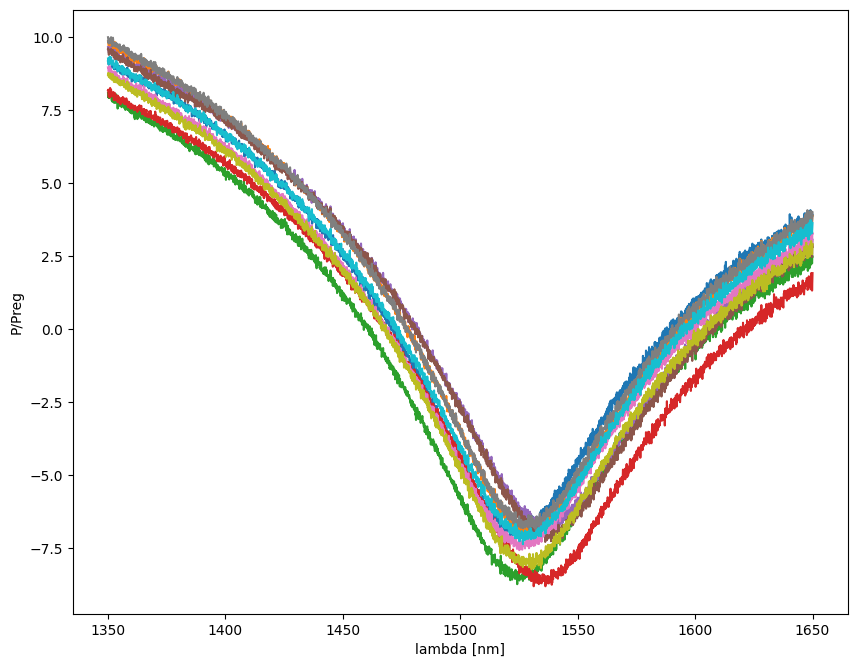

In [57]:
figure(figsize=(10, 8), dpi=100)
plt.plot(df_air)
plt.xlabel('lambda [nm]')
plt.ylabel('P/Preg')
plt.show()

In [13]:
minvalueIndexLabel_air = df_air.idxmin()
minvalueIndexLabel_air

sensor01    1521.3
sensor02    1531.3
sensor03    1524.3
sensor04    1536.3
sensor05    1534.0
sensor06    1536.2
sensor07    1525.2
sensor08    1532.2
sensor09    1530.4
sensor10    1526.7
dtype: float64

In [14]:
mean_air = minvalueIndexLabel_air.mean()
mean_air

1529.7899999999997

## Data received for sensors measured in water

In [15]:
data_01_W = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_01_20/sensor01_water.txt')
data_02_W = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_02_20/sensor02_water.txt')
data_03_W = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_03_20/sensor03_water.txt')
data_04_W = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_04_20/sensor04_water.txt')
data_05_W = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_05_20/sensor05_water.txt')
data_06_W = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_06_20/sensor06_water.txt')
data_07_W = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_07_20/sensor07_water.txt')
data_08_W = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_08_20/sensor08_water.txt')
data_09_W = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_09_20/sensor09_water.txt')
data_10_W = pd.read_csv ('/content/drive/MyDrive/Dataset/sesion_10_20/sensor10_water.txt')

In [16]:
col_names= ['lambda [nm]', 'sensor01']
data_01_W.columns = col_names
col_names= ['lambda [nm]', 'sensor02']
data_02_W.columns = col_names
col_names= ['lambda [nm]', 'sensor03']
data_03_W.columns = col_names
col_names= ['lambda [nm]', 'sensor04']
data_04_W.columns = col_names
col_names= ['lambda [nm]', 'sensor05']
data_05_W.columns = col_names
col_names= ['lambda [nm]', 'sensor06']
data_06_W.columns = col_names
col_names= ['lambda [nm]', 'sensor07']
data_07_W.columns = col_names
col_names= ['lambda [nm]', 'sensor08']
data_08_W.columns = col_names
col_names= ['lambda [nm]', 'sensor09']
data_09_W.columns = col_names
col_names= ['lambda [nm]', 'sensor10']
data_10_W.columns = col_names

In [60]:
data_1 = pd.merge(pd.merge(data_01_W,data_02_W,on = 'lambda [nm]'),pd.merge(data_03_W,data_04_W, on = 'lambda [nm]'))
data_2 = pd.merge(pd.merge(data_1,data_05_W,on = 'lambda [nm]'),pd.merge(data_06_W,data_07_W, on = 'lambda [nm]'))
data_water = pd.merge(pd.merge(data_2,data_08_W,on = 'lambda [nm]'),pd.merge(data_09_W,data_10_W, on = 'lambda [nm]'))
col = data_water['lambda [nm]'] * 1000000000
data_water['lambda'] = col
data_water.drop('lambda [nm]', inplace=True, axis=1)
df_water = data_water.set_index("lambda")
df_water

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10
lambda,,,,,,,,,,
1350.1,8.42870,9.12380,7.3520,7.3794,8.8197,8.7934,8.2177,9.24730,8.0872,8.53270
1350.2,8.44220,9.11590,7.3746,7.3017,8.7279,8.7887,8.0696,9.21270,8.0130,8.40860
1350.3,8.41440,9.04310,7.2810,7.2528,8.7620,8.7277,8.1302,9.13130,7.9647,8.46760
1350.4,8.40340,8.98600,7.0982,7.2032,8.7683,8.7171,7.9694,9.07600,7.9518,8.32770
1350.5,8.33510,9.03390,7.1982,7.2758,8.7061,8.7221,8.0236,9.12810,7.8739,8.43900
...,...,...,...,...,...,...,...,...,...,...
1649.6,-0.51536,-0.61592,-1.7755,-2.7569,-1.7018,-1.8323,-1.0996,-0.47930,-1.5635,-0.86565
1649.7,-0.36859,-0.76438,-1.8028,-2.8164,-1.4070,-1.7141,-1.1737,-0.51990,-1.4177,-0.84435
1649.8,-0.57172,-0.46729,-1.9613,-2.8534,-1.6194,-1.9062,-1.2078,-0.77034,-1.5810,-0.97383


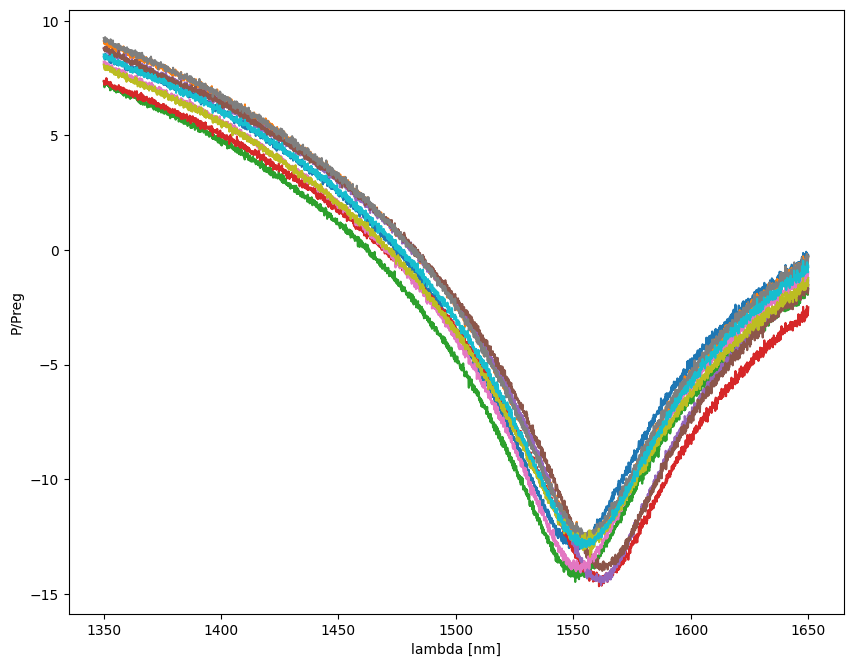

In [61]:
figure(figsize=(10, 8), dpi=100)
plt.plot(df_water)
plt.xlabel('lambda [nm]')
plt.ylabel('P/Preg')
plt.show()

In [63]:
minvalueIndexLabel_water = df_water.idxmin()
minvalueIndexLabel_water


sensor01    1549.8
sensor02    1555.6
sensor03    1550.8
sensor04    1560.9
sensor05    1561.8
sensor06    1562.3
sensor07    1553.1
sensor08    1557.4
sensor09    1557.1
sensor10    1553.0
dtype: float64

In [67]:
mean_air = minvalueIndexLabel_air.mean()
mean_air

1529.7899999999997

## Data received for sensors measured in IPA

In [20]:
data_01_IPA = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_01_20/sensor01_izopropanol.txt')
data_02_IPA = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_02_20/sensor02_izopropanol.txt')
data_03_IPA = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_03_20/sensor03_izopropanol.txt')
data_04_IPA = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_04_20/sensor04_izopropanol.txt')
data_05_IPA = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_05_20/sensor05_izopropanol.txt')
data_06_IPA = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_06_20/sensor06_izopropanol.txt')
data_07_IPA = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_07_20/sensor07_izopropanol.txt')
data_08_IPA = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_08_20/sensor08_izopropanol.txt')
data_09_IPA = pd.read_csv('/content/drive/MyDrive/Dataset/sesion_09_20/sensor09_izopropanol.txt')
data_10_IPA = pd.read_csv ('/content/drive/MyDrive/Dataset/sesion_10_20/sensor10_izopropanol.txt')

In [21]:
col_names= ['lambda [nm]', 'sensor01']
data_01_IPA.columns = col_names
col_names= ['lambda [nm]', 'sensor02']
data_02_IPA.columns = col_names
col_names= ['lambda [nm]', 'sensor03']
data_03_IPA.columns = col_names
col_names= ['lambda [nm]', 'sensor04']
data_04_IPA.columns = col_names
col_names= ['lambda [nm]', 'sensor05']
data_05_IPA.columns = col_names
col_names= ['lambda [nm]', 'sensor06']
data_06_IPA.columns = col_names
col_names= ['lambda [nm]', 'sensor07']
data_07_IPA.columns = col_names
col_names= ['lambda [nm]', 'sensor08']
data_08_IPA.columns = col_names
col_names= ['lambda [nm]', 'sensor09']
data_09_IPA.columns = col_names
col_names= ['lambda [nm]', 'sensor10']
data_10_IPA.columns = col_names

In [68]:
data_1_I = pd.merge(pd.merge(data_01_IPA,data_02_IPA,on = 'lambda [nm]'),pd.merge(data_03_IPA,data_04_IPA, on = 'lambda [nm]'))
data_2_I = pd.merge(pd.merge(data_1_I,data_05_IPA,on = 'lambda [nm]'),pd.merge(data_06_IPA,data_07_IPA, on = 'lambda [nm]'))
data_IPA = pd.merge(pd.merge(data_2_I,data_08_IPA,on = 'lambda [nm]'),pd.merge(data_09_IPA,data_10_IPA, on = 'lambda [nm]'))
col = data_IPA['lambda [nm]'] * 1000000000
data_IPA['lambda'] = col
data_IPA.drop('lambda [nm]', inplace=True, axis=1)
df_IPA = data_IPA.set_index("lambda")
df_IPA

,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10
lambda,,,,,,,,,,
1350.1,8.675000,9.301200,7.4798,7.6049,9.0295,9.0038,8.32460,9.457100,8.26410,8.73220
1350.2,8.711600,9.251200,7.4810,7.5770,8.9789,8.9254,8.29750,9.330400,8.20800,8.67480
1350.3,8.715700,9.273400,7.4719,7.4928,8.9369,8.8786,8.33000,9.317500,8.18220,8.59320
1350.4,8.679200,9.199900,7.3330,7.4703,8.9419,8.8290,8.26280,9.275100,8.07940,8.56650
1350.5,8.631200,9.127300,7.3773,7.4842,8.8595,8.8734,8.28260,9.322600,8.03800,8.56840
...,...,...,...,...,...,...,...,...,...,...
1649.6,-0.335950,-0.394290,-1.7470,-2.4698,-1.4352,-1.5332,-0.98811,-0.179920,-1.28480,-0.61478
1649.7,-0.199560,-0.215570,-1.4242,-2.5143,-1.3112,-1.3984,-1.03650,-0.329130,-1.27890,-0.53629
1649.8,-0.403730,-0.296660,-1.5681,-2.5354,-1.4019,-1.4084,-1.05290,-0.503520,-1.46690,-0.81838


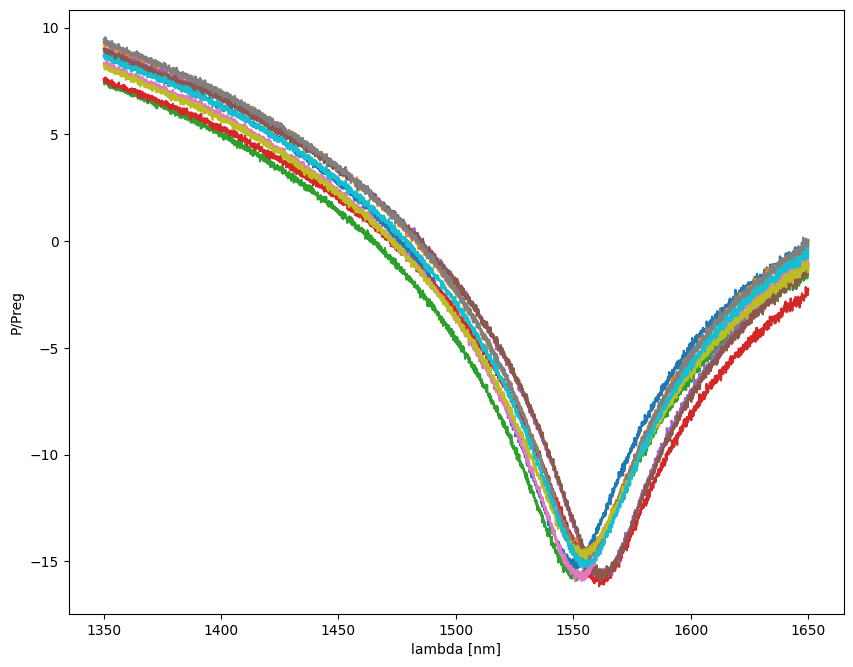

In [69]:
figure(figsize=(10, 8), dpi=100)
plt.plot(df_IPA)
plt.xlabel('lambda [nm]')
plt.ylabel('P/Preg')
plt.show()

In [24]:
minvalueIndexLabel_IPA = df_IPA.idxmin()
minvalueIndexLabel_IPA

sensor01    1551.7
sensor02    1555.6
sensor03    1550.9
sensor04    1561.0
sensor05    1561.5
sensor06    1560.9
sensor07    1553.6
sensor08    1554.3
sensor09    1555.6
sensor10    1553.9
dtype: float64

## Adding a target column to dataframe

In [25]:
third_col_air= ['0','0','0','0','0','0','0','0','0','0',]   # 0 = air
third_col_water= ['1','1','1','1','1','1','1','1','1','1',] # 1= water
third_col_IPA= ['2','2','2','2','2','2','2','2','2','2',]   # 2 = IPA

In [70]:
d_air = df_air.min().to_frame(name = None)
d_water=df_water.min().to_frame(name = None)
d_IPA=df_IPA.min().to_frame(name = None)

d_air['medium'] = third_col_air
d_water['medium'] = third_col_water
d_IPA['medium'] = third_col_IPA
index_air = minvalueIndexLabel_air.to_frame(name = None)
index_water = minvalueIndexLabel_water.to_frame(name = None)
index_IPA = minvalueIndexLabel_IPA.to_frame(name = None)

## Marging air, water and IPA datasets together

In [74]:
air_data =pd.merge (index_air,d_air, right_index = True, left_index = True)
water_data =pd.merge (index_water,d_water, right_index = True, left_index = True)
IPA_data =pd.merge (index_IPA,d_IPA, right_index = True, left_index = True)

frames = [air_data, water_data, IPA_data]
alldata = pd.concat(frames)
all_data = alldata.astype({'medium': int})
all_data.reset_index(drop=True)

,0_x,0_y,medium
0,1521.3,-7.1512,0
1,1531.3,-7.1195,0
2,1524.3,-8.7273,0
3,1536.3,-8.7982,0
4,1534.0,-6.9076,0
5,1536.2,-7.2816,0
6,1525.2,-7.5621,0
7,1532.2,-6.8871,0
8,1530.4,-8.2183,0
9,1526.7,-7.3581,0


# Spliting and scalling of investigated data

In [75]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
target_column = 'medium'
features = all_data.drop('medium', axis = 1).values
target = all_data[target_column]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state= 42)
scaler = preprocessing.MinMaxScaler()
scaled_train_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.fit_transform(X_test)



# Modelling "all_data" dataframe

SVC with rbf kernel

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 42)
scores = cross_val_score(svc, scaled_train_X, y_train, cv = 3, scoring = 'accuracy')
print("SVC with rbf kernel -> cross validation accuracy: mean = %0.2f, std = %0.2f" %(np.mean(scores), np.std(scores)))

SVC with rbf kernel -> cross validation accuracy: mean = 0.77, std = 0.08


AdaBooster

In [39]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=1000, random_state=42)
score = cross_val_score(Ada, scaled_train_X, y_train, cv=3, scoring = 'accuracy', n_jobs = 5)
print(" cross validation accuracy: mean = %0.2f, std = %0.2f" %(np.mean(score), np.std(score)))

 cross validation accuracy: mean = 0.91, std = 0.06


Data modelling with Tensorflow Sequential model

In [92]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

imput_size = 30
output_size = 3
hidden_layers = 200

model = Sequential()
model.add( Dense( 64, activation = 'relu', input_shape= X_train[0].shape))
model.add( Dense (128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add( Dense (128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add( Dense (128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add( Dense (128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add( Dense (64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add( Dense (64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add( Dense (64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add( Dense (64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add( Dense (3, activation = 'softmax',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])
hist = model.fit(scaled_train_X, y_train, batch_size = 10, epochs = 30, validation_split = 0.1)

Epoch 1/30
2/2 [==============================] - 3s 422ms/step - loss: 1.8474 - accuracy: 0.5789 - val_loss: 1.8342 - val_accuracy: 0.3333
Epoch 2/30
2/2 [==============================] - 0s 71ms/step - loss: 1.8215 - accuracy: 0.5789 - val_loss: 1.8149 - val_accuracy: 0.3333
Epoch 3/30
2/2 [==============================] - 0s 49ms/step - loss: 1.7923 - accuracy: 0.6842 - val_loss: 1.7879 - val_accuracy: 0.3333
Epoch 4/30
2/2 [==============================] - 0s 55ms/step - loss: 1.7643 - accuracy: 0.6842 - val_loss: 1.7617 - val_accuracy: 0.3333
Epoch 5/30
2/2 [==============================] - 0s 40ms/step - loss: 1.7343 - accuracy: 0.6842 - val_loss: 1.7357 - val_accuracy: 0.3333
Epoch 6/30
2/2 [==============================] - 0s 36ms/step - loss: 1.7017 - accuracy: 0.6842 - val_loss: 1.7137 - val_accuracy: 0.3333
Epoch 7/30
2/2 [==============================] - 0s 41ms/step - loss: 1.6620 - accuracy: 0.6842 - val_loss: 1.6812 - val_accuracy: 0.3333
Epoch 8/30
2/2 [==========

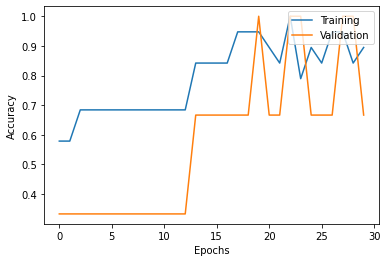

In [93]:
plt.plot(hist.history['accuracy'])

plt.plot(hist.history['val_accuracy'])

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend(['Training', 'Validation'], loc='upper right')

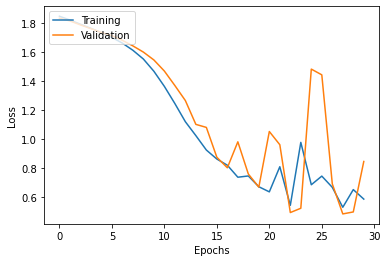

In [94]:
plt.plot(hist.history['loss'])

plt.plot(hist.history['val_loss'])

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend(['Training', 'Validation'], loc='upper left')

Model evaluation

In [95]:
model.evaluate(scaled_test_X, y_test,batch_size=128)

1/1 [==============================] - 0s 31ms/step - loss: 0.5888 - accuracy: 0.8750


[0.5887746810913086, 0.875]

# Modelling and prediction using multilayer perceptron (MLP)

In [44]:
from sklearn.neural_network import MLPClassifier

In [45]:
mlp = MLPClassifier(random_state = 1, hidden_layer_sizes=(200,100,), activation = 'relu')
mlp.fit(scaled_train_X, y_train)
pred = mlp.predict(scaled_test_X)
print('Błędnie sklasyfikowane próbki: %d' % (y_test != pred).sum())
from sklearn.metrics import accuracy_score
print("Dokładność: %.2f" % accuracy_score(y_test, pred))

Błędnie sklasyfikowane próbki: 1
Dokładność: 0.88


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Plotting decision regions.
inspired by S. Reshka's "Python Machine Learning" book

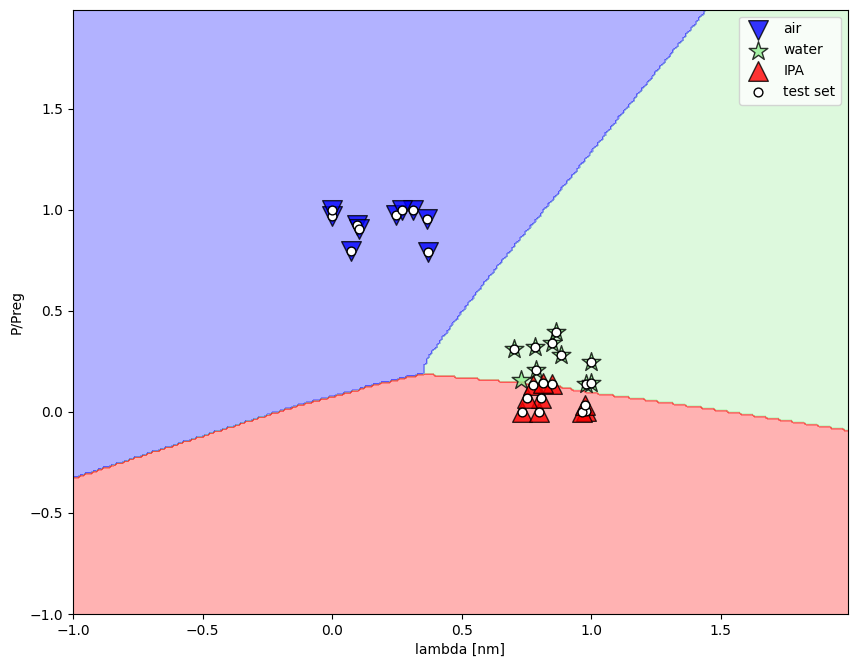

In [46]:
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=100)
def plot_decision_regions(features, target, classyfier, test_idx = None, resolution = 0.02):
  markers = ('v', "*", "^",'s','o')
  colors = ('blue', "lightgreen", 'red','gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(target))])
  x_min, x_max = features[:,0].min()-1, features[:,0].max()+1
  y_min, y_max = features[:,1].min()-1, features[:,1].max()+1
  resolution = 0.01
  xx, yy = np.meshgrid(np.arange(x_min,x_max, resolution),
                      np.arange(y_min, y_max, resolution))
  Z= mlp.predict(np.array([xx.ravel(),yy.ravel()]).T)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  classes = ['air', 'water', 'IPA']
  for index, cl in enumerate(np.unique(target)):
    plt.scatter(features[target == cl, 0], features[target == cl, 1], alpha=0.8,
            color=colors[index], marker = markers[index], s=200, label = classes[index], edgecolors = 'black')
  if test_idx:
    scaled_test_X, y_test = features[test_idx, :], target[test_idx]
    plt.scatter(scaled_test_X[:,0], scaled_test_X[:,1],
               edgecolor = 'black',color = 'white', marker = 'o', s = 40, label = 'test set')
X_combined = np.vstack((scaled_train_X, scaled_test_X))
y_combined = np.hstack((y_train, y_test))
    
plot_decision_regions(features=X_combined, target = y_combined, classyfier = mlp, test_idx = range(1, 30))

plt.xlabel('lambda [nm]')
plt.ylabel('P/Preg')
plt.legend(loc = 'upper right')

plt.show()

# Modelling and prediction using RandomForestClassifier (rfc)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(scaled_train_X, y_train)
pred = rfc.predict(scaled_test_X)
print('Błędnie sklasyfikowane próbki: %d' % (y_test != pred).sum())
from sklearn.metrics import accuracy_score
print("Dokładność: %.2f" % accuracy_score(y_test, pred))

Błędnie sklasyfikowane próbki: 1
Dokładność: 0.88


Plotting decision regions.

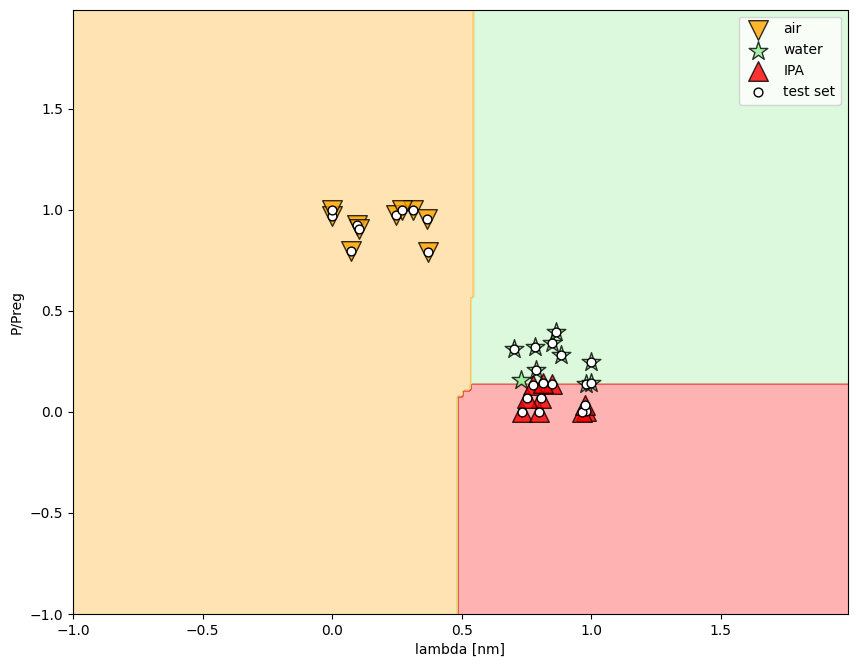

In [78]:
figure(figsize=(10, 8), dpi=100)
def plot_decision_regions(features, target, classyfier, test_idx = None, resolution = 0.02):
  markers = ('v', "*", "^",'s','o')
  colors = ('orange', "lightgreen", 'red','gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(target))])
  x_min, x_max = features[:,0].min()-1, features[:,0].max()+1
  y_min, y_max = features[:,1].min()-1, features[:,1].max()+1
  resolution = 0.01
  xx, yy = np.meshgrid(np.arange(x_min,x_max, resolution),
                      np.arange(y_min, y_max, resolution))
  Z= rfc.predict(np.array([xx.ravel(),yy.ravel()]).T)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  classes = ['air', 'water', 'IPA']
  for index, cl in enumerate(np.unique(target)):
    plt.scatter(features[target == cl, 0], features[target == cl, 1], alpha=0.8,
            color=colors[index], marker = markers[index], s=200, label = classes[index], edgecolors = 'black')
  if test_idx:
    scaled_test_X, y_test = features[test_idx, :], target[test_idx]
    plt.scatter(scaled_test_X[:,0], scaled_test_X[:,1],
               edgecolor = 'black',color = 'white', marker = 'o', s = 40, label = 'test set')
X_combined = np.vstack((scaled_train_X, scaled_test_X))
y_combined = np.hstack((y_train, y_test))
    
plot_decision_regions(features=X_combined, target = y_combined, classyfier = rfc, test_idx = range(1, 30))

plt.xlabel('lambda [nm]')
plt.ylabel('P/Preg')
plt.legend(loc = 'upper right')

plt.show()

# Modelling and prediction using KNeighborsClassifier (knn)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(3)
knn.fit(scaled_train_X, y_train)
y_pred = knn.predict(scaled_test_X)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         2
           2       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.83      0.78         8
weighted avg       0.88      0.75      0.75         8




Plotting decision regions.



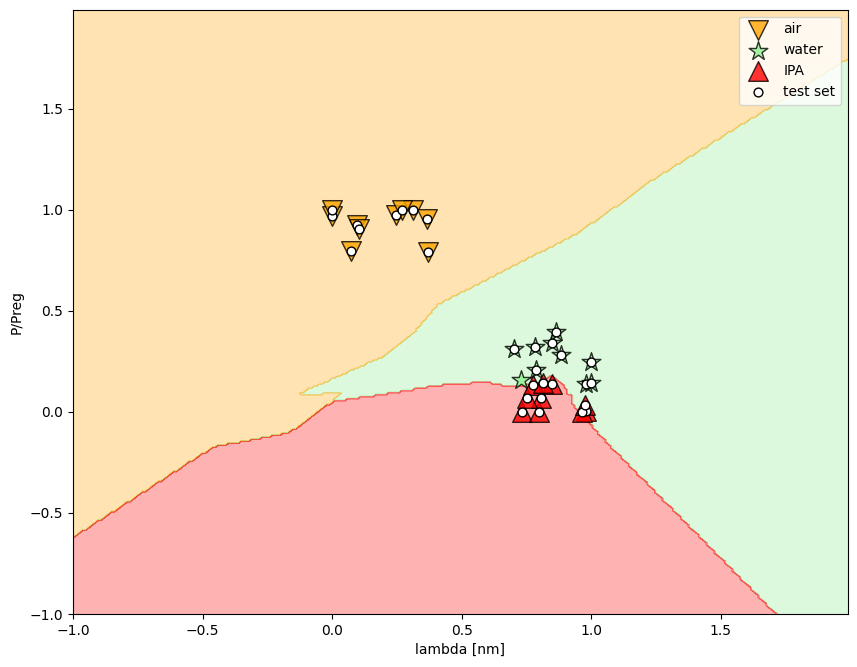

In [91]:
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=100)
def plot_decision_regions(features, target, classyfier, test_idx = None, resolution = 0.02):
  markers = ('v', "*", "^",'s','o')
  colors = ('orange', "lightgreen", 'red','gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(target))])
  x_min, x_max = features[:,0].min()-1, features[:,0].max()+1
  y_min, y_max = features[:,1].min()-1, features[:,1].max()+1
  resolution = 0.01
  xx, yy = np.meshgrid(np.arange(x_min,x_max, resolution),
                      np.arange(y_min, y_max, resolution))
  Z= knn.predict(np.array([xx.ravel(),yy.ravel()]).T)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  classes = ['air', 'water', 'IPA']
  for index, cl in enumerate(np.unique(target)):
    plt.scatter(features[target == cl, 0], features[target == cl, 1], alpha=0.8,
            color=colors[index], marker = markers[index], s=200, label = classes[index], edgecolors = 'black')
  if test_idx:
    scaled_test_X, y_test = features[test_idx, :], target[test_idx]
    plt.scatter(scaled_test_X[:,0], scaled_test_X[:,1],
               edgecolor = 'black', color = 'white', marker = 'o', s = 40, label = 'test set')
X_combined = np.vstack((scaled_train_X, scaled_test_X))
y_combined = np.hstack((y_train, y_test))
    
plot_decision_regions(features=X_combined, target = y_combined, classyfier = knn, test_idx = range(1, 30))

plt.xlabel('lambda [nm]')
plt.ylabel('P/Preg')
plt.legend(loc = 'upper right')

plt.show()